This file is used for retrieving and plotting text detection and transcription on top of infographic images. The provided raw_ocr_output pickle file contains the precomputed OCR results from Google's API for our 63K infographic dataset. These data can be used for applications including topic prediction, summarization, captioning, question answering, etc.

In [1]:
import pickle
from PIL import Image
import os
import re
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib.patches as patches
import numpy as np

IMDIR = '/data/graphics/SpandanGraphsProject/fullsize-60k/' # change to dir where infographic images are downloaded

### Plot text detections and transcription (OCR) on top of infographic: ###

In [2]:
f = open('raw_ocr_output.pickle','rb')
ocr = pickle.load(f)
f.close()
# ocr is a dictionary that maps infographic filenames to the extracted text
# the extracted text is a list, where the first element is the full text extraction (with coordinates), 
# and subsequent elements are individual words and their bounding box coordinates
# e.g. ('Road', ['(11,26)', '(55,26)', '(55,47)', '(11,47)'])

In [3]:
print('We ran Googles OCR on %d infographics.'%len(ocr))

We ran Googles OCR on 64246 infographics.


In [4]:
# plot results for a particular file
# curfile = 'mbaunc-alumni-map_50b51daea239a.jpg'
curfile = 'road-traffic-accidents-infographic_50290aaae47b1.png'
ocr[curfile][2]

('Road', ['(11,26)', '(55,26)', '(55,47)', '(11,47)'])

In [ ]:
# plot results for a randomly-selected file (different every time)
allkeys = list(ocr.keys())
res = np.random.permutation(len(allkeys))
curfile = allkeys[res[0]]

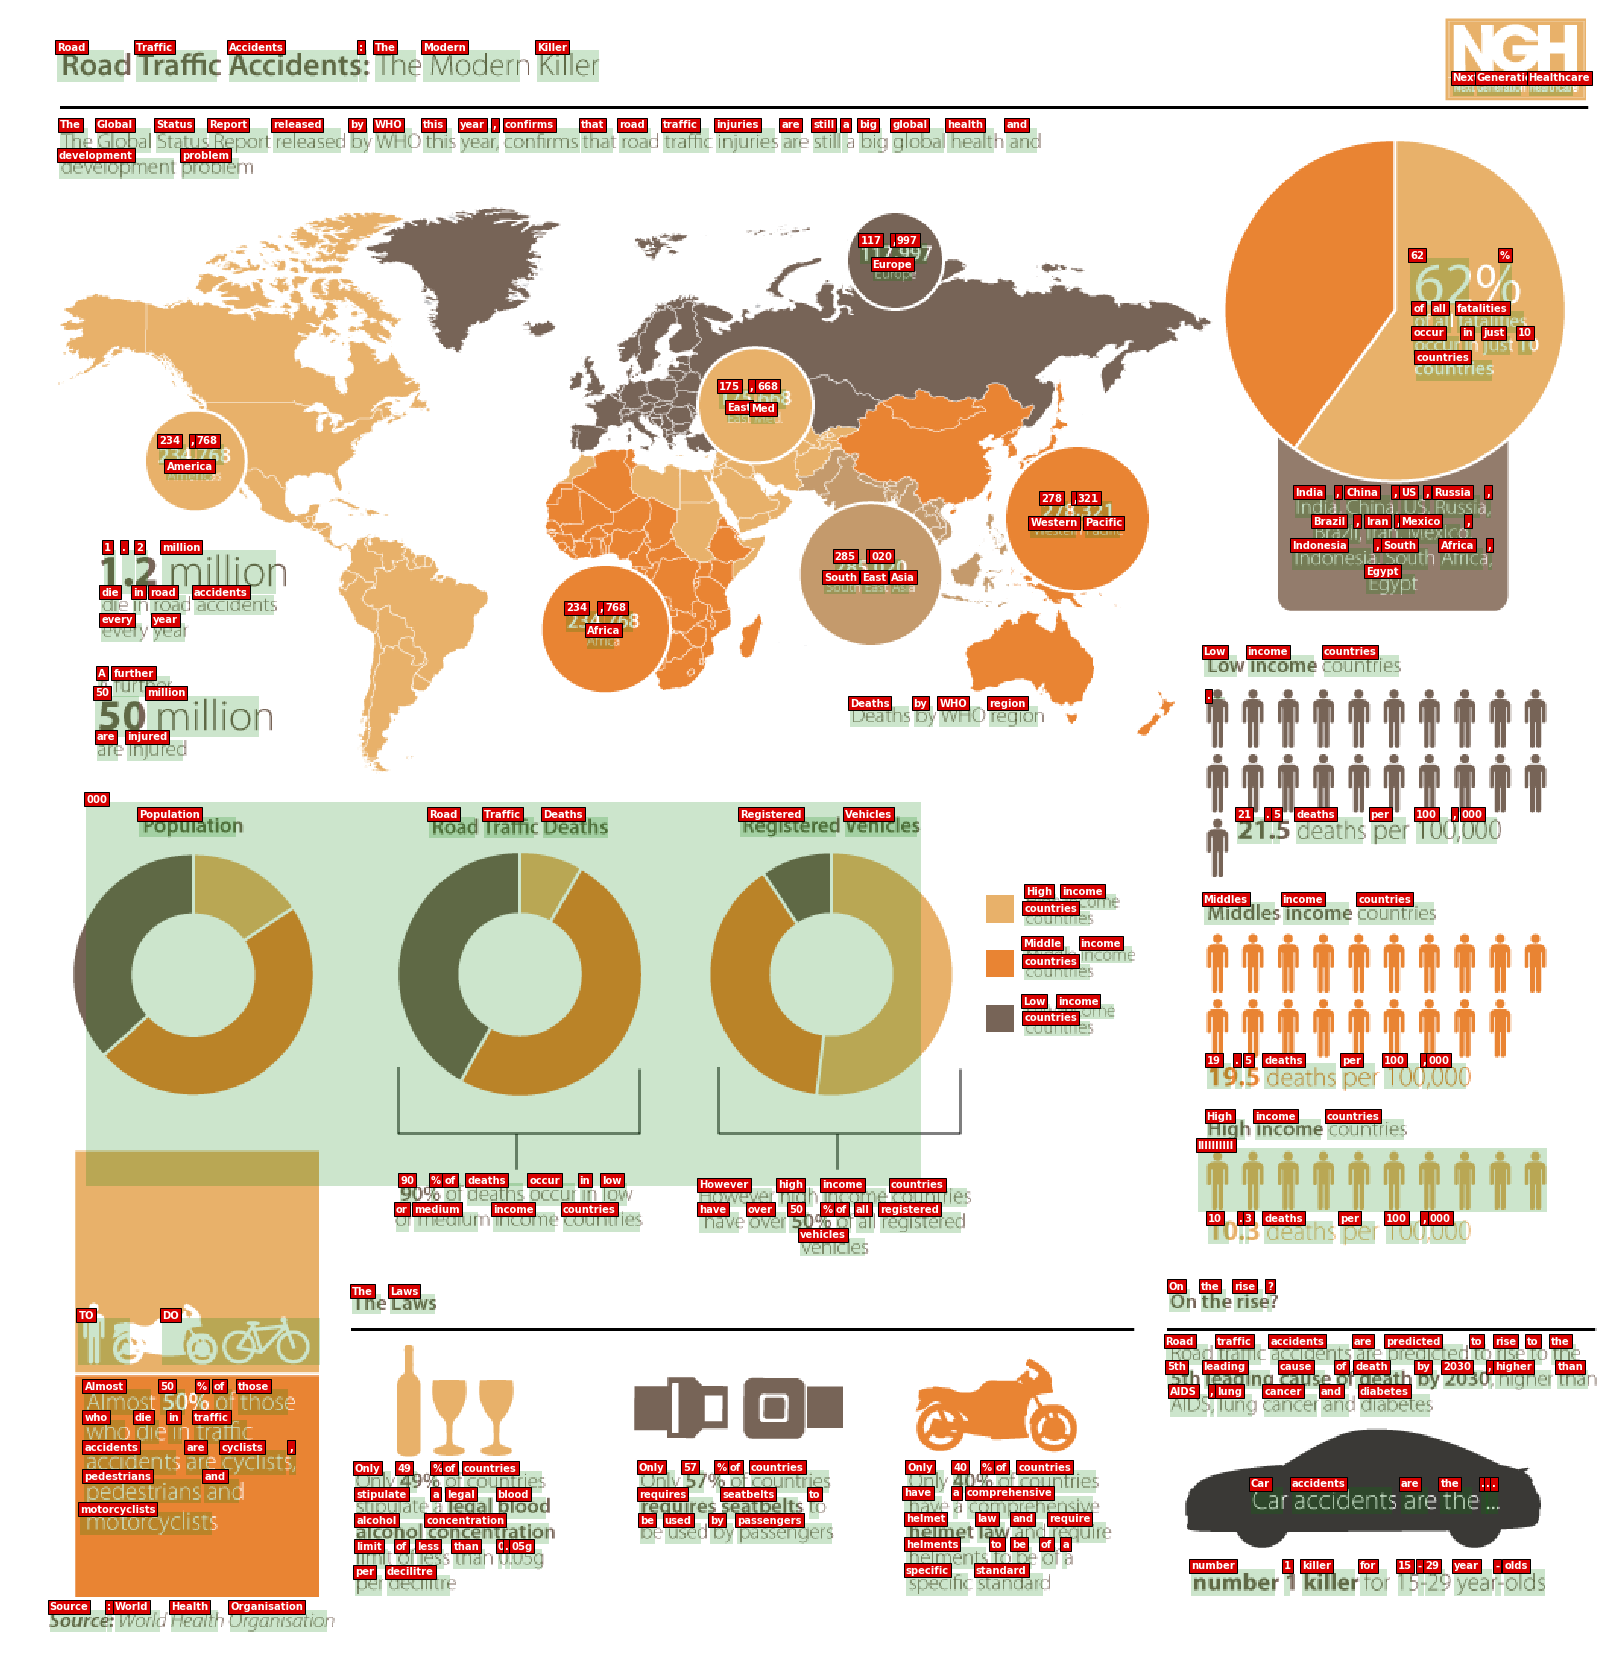

In [5]:
printTranscription = True # set to False if just want to see the locations where text was detected (highlighted in green)

def getxy(curstr):
    m = re.search('(\d+),(\d+)', curstr)
    if m:
        return (int(m.group(1)),int(m.group(2)))
    else:
        return ('','')

im = Image.open(os.path.join(IMDIR,curfile))
fig,ax = plt.subplots(1,figsize=(50,30));
ax.imshow(im); plt.axis('off');
w,h = im.size

for i in range(1,len(ocr[curfile])):
    boxes = ocr[curfile][i][1]
    x_min,y_min = getxy(boxes[0])
    x_max,y_max = getxy(boxes[2])
    
    if x_min and y_min and x_max and y_max:
    
        w = x_max - x_min
        h = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), w, h, facecolor='green',alpha = 0.2)
        ax.add_patch(rect)

        if printTranscription:
            ax.text(x_min, y_min, ocr[curfile][i][0], \
                    size = 10, weight = 'bold', color='white', \
                    bbox={'facecolor':(0.84839019607843136, 0.0, 0.0, 1.0), 'alpha':1, 'pad':2})

### Just get the words that have been extracted from infographics (as a list): ###

In [7]:
f = open('google_text_extraction_output.pckl','rb')
infographic_name_to_words = pickle.load(f)
f.close()

print('We have extracted words from %d infographics.'%len(infographic_name_to_words))

We have extracted words from 62361 infographics.


In [8]:
print(infographic_name_to_words[curfile])

['NGH', 'Road', 'Traffic', 'Accidents:', 'The', 'Modern', 'Killer', 'Next', 'The', 'Global', 'Status', 'Report', 'released', 'by', 'WHO', 'this', 'year,', 'confirms', 'that', 'road', 'traffic', 'injuries', 'are', 'still', 'a', 'big', 'global', 'health', 'and', 'development', 'problem', '117,997', 'Europe', '62%', 'of', 'all', 'fatalities', 'occur', 'in', 'just', '10', 'countries', '175,668', 'East', 'Med', '234,768', 'Americas', 'India,', 'China,', 'US,', 'Russia', 'Brazil,', 'Iran,', 'Mexico,', 'Indonesia,', 'South', 'Africa', 'gypt', '278,321', 'Western', 'Pacific', '1.2', 'million', '285,020', 'South', 'East', 'Asia', 'die', 'in', 'road', 'accidents', 'every', 'year', '234,768', 'Africa', 'Low', 'income', 'countries', 'A', 'further', '-', '50', 'million', '"', '"', '"', '"', 'T', 'Deaths', 'by', 'WHO', 'region', 'are', 'injured', 'Population', 'Road', 'Traffic', 'Deaths', 'Registered', 'Vehicles', '21.5', 'deaths', 'per', '100,000', 'High', 'income', 'countries', 'Middles', 'income'